In [1]:
from evaluation_metric import amex_metric
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [103]:
data = pd.read_csv('Output/train_DART_folds.csv', index_col='customer_ID')
labels = pd.read_pickle('Data/train_labels.pkl').loc[data.index]
columns = data.columns

data['mean'] = data[columns].mean(axis=1)
data['min'] = data[columns].min(axis=1)
data['max'] = data[columns].max(axis=1)
data['median'] = data[columns].median(axis=1)
data['skew'] = data[columns].skew(axis=1)
data['kurtosis'] = data[columns].kurtosis(axis=1)
data['diff'] = data['max'] - data['min']
data.sort_values('mean', ascending=False, inplace=True)

data.shape

(458913, 26)

In [104]:
scaler = StandardScaler()
train_scaled_df = scaler.fit_transform(data.iloc[:])

pca = PCA(n_components=20, random_state=42)
train_scaled_PCA = pca.fit_transform(train_scaled_df)
train_scaled_PCA_df = pd.DataFrame(train_scaled_PCA, index=data.index, columns=['PCA' + str(i) for i in range(20)])
train_scaled_PCA_df['target'] = labels['target']
train_scaled_PCA_df['rank'] = range(0, train_scaled_PCA_df.shape[0], 1)
print(pca.explained_variance_ratio_)

[8.92117389e-01 4.52071641e-02 3.40893358e-02 2.16020865e-02
 4.10263589e-03 7.05306181e-04 5.61571469e-04 3.07125610e-04
 1.38354330e-04 1.17389826e-04 1.13165293e-04 1.07703126e-04
 9.86563130e-05 9.36902809e-05 8.86377586e-05 8.69255294e-05
 7.80515264e-05 7.60131361e-05 7.43319270e-05 7.26648108e-05]


In [105]:
label_1 = train_scaled_PCA_df[train_scaled_PCA_df['target'] == 1]
label_0 = train_scaled_PCA_df[train_scaled_PCA_df['target'] == 0]

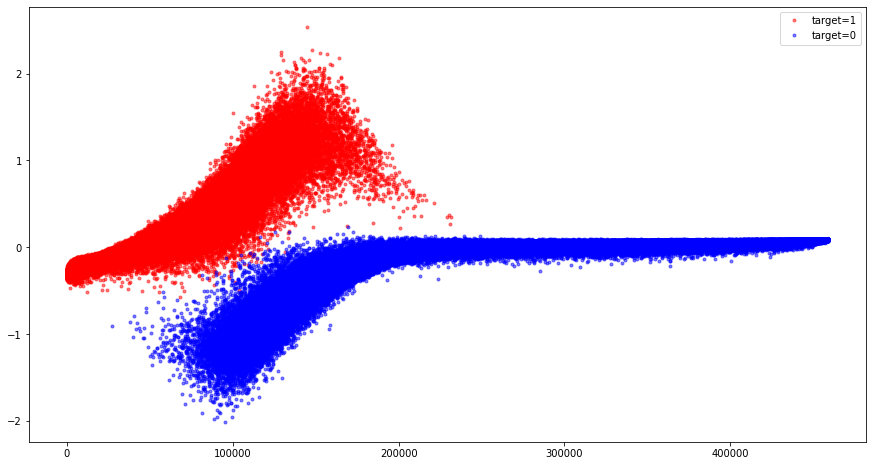

In [106]:
plt.figure(figsize=(15,8))
plt.plot(label_1['rank'], label_1['PCA4'], '.', alpha=0.5, color='red', label='target=1')
plt.plot(label_0['rank'], label_0['PCA4'], '.', alpha=0.5, color='blue', label='target=0')
plt.legend()
plt.show()

In [162]:
ttt = train_scaled_PCA_df.iloc[:200000, :20]
tsne = TSNE(random_state=42)
train_scaled_PCA_tsne = tsne.fit_transform(ttt)
train_tsne_df = pd.DataFrame(train_scaled_PCA_tsne, index=ttt.index, columns=['TSNE' + str(i) for i in range(2)])
train_tsne_df.shape

In [ ]:
train_tsne_df['target'] = labels['target'].loc[ttt.index]

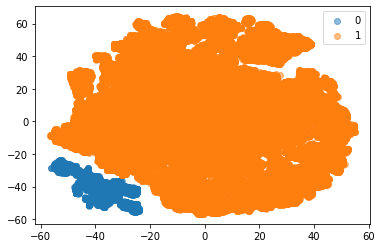

In [154]:
groups = train_tsne_df.groupby('target')
for name, group in groups:
    plt.scatter(group['TSNE0'], group['TSNE1'], marker="o", label=name, alpha = 0.5)
plt.legend()
plt.show()

### Prediction

In [155]:
test = pd.read_csv('Output/test_DART_folds.csv', index_col='customer_ID')
columns = test.columns

test['mean'] = test[columns].mean(axis=1)
test['min'] = test[columns].min(axis=1)
test['max'] = test[columns].max(axis=1)
test['median'] = test[columns].median(axis=1)
test['skew'] = test[columns].skew(axis=1)
test['kurtosis'] = test[columns].kurtosis(axis=1)
test['diff'] = test['max'] - test['min']

test.shape

(924621, 26)

In [156]:
test.sort_values('mean', ascending=False, inplace=True)
scaler = StandardScaler()
test_scaled_df = scaler.fit_transform(test.iloc[:])

pca = PCA(n_components=20, random_state=42)
test_scaled_PCA = pca.fit_transform(test_scaled_df)
test_scaled_PCA_df = pd.DataFrame(test_scaled_PCA, index=test.index, columns=['PCA' + str(i) for i in range(20)])
test_scaled_PCA_df['rank'] = range(0, test_scaled_PCA_df.shape[0], 1)
print(pca.explained_variance_ratio_)

[8.98062637e-01 4.66409855e-02 3.06803608e-02 2.25920594e-02
 3.83917210e-04 1.59062370e-04 1.50526784e-04 1.25329255e-04
 1.20099497e-04 1.09024593e-04 1.01131608e-04 9.85062186e-05
 9.22374152e-05 9.02373265e-05 8.55386212e-05 8.39750029e-05
 8.14399032e-05 7.53654082e-05 7.20427528e-05 6.60537215e-05]


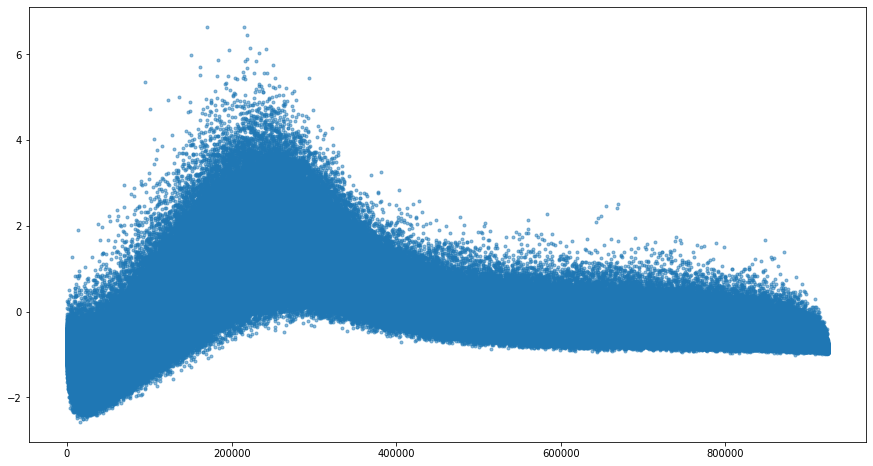

In [157]:
plt.figure(figsize=(15,8))
plt.plot(test_scaled_PCA_df['rank'], test_scaled_PCA_df['PCA2'], '.', alpha=0.5)
plt.show()

In [160]:
tt = test_scaled_PCA_df.iloc[100000:200000, :20]
tsne = TSNE(random_state=42)
test_scaled_PCA_tsne = tsne.fit_transform(tt)
tsne_df = pd.DataFrame(test_scaled_PCA_tsne, index=tt.index, columns=['TSNE' + str(i) for i in range(2)])
tsne_df.shape

(100000, 2)

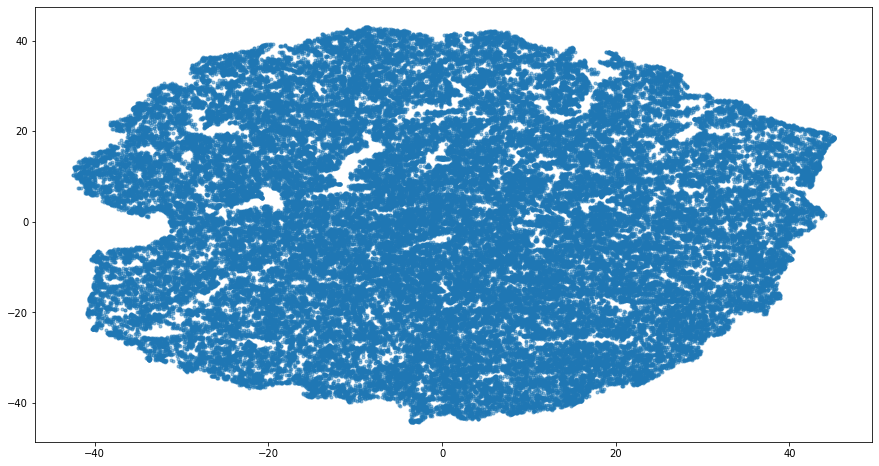

In [161]:
plt.figure(figsize=(15,8))
plt.plot(tsne_df['TSNE0'], tsne_df['TSNE1'], '.', alpha=0.5)
plt.show()